In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/predictive_maintenance.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df['Product ID'].unique().shape[0]==df.shape[0]
df.drop(['UDI','Product ID','Type'],axis=1,inplace=True)
df.shape[0]

10000

In [ ]:
df['Rotational speed [rpm]']=df['Rotational speed [rpm]'].astype('float64')
df['Tool wear [min]']=df['Tool wear [min]'].astype('float64')
df.rename(mapper={'Air temperature [K]': 'Air temperature','Process temperature [K]': 'Process temperature','Rotational speed [rpm]': 'Rotational speed','Torque [Nm]': 'Torque','Tool wear [min]': 'Tool wear'}, axis=1, inplace=True)

In [ ]:
features=[col for col in df.columns if df[col].dtype=='float64']
target=['Target','Failure Type']
features

['Air temperature',
 'Process temperature',
 'Rotational speed',
 'Torque',
 'Tool wear']

In [ ]:
df.columns

Index(['Air temperature', 'Process temperature', 'Rotational speed', 'Torque',
       'Tool wear', 'Target', 'Failure Type'],
      dtype='object')

In [ ]:
ind=df.loc[df['Failure Type']=='Random Failures',target].index
df.drop(index=ind,inplace=True)
t = df.loc[(df['Target']==1) & (df['Failure Type']=='No Failure')].index
df.drop(index=t,inplace=True)

In [ ]:
# sns.set(rc = {'figure.figsize':(4,1)})
# for temp in features:
#   sns.histplot(data=df,x=temp)
#   plt.show()

In [ ]:
temp=df['Failure Type'].unique()
temp_2=df['Target'].unique()

print('Target Distribution')
for k in temp_2:
  print(f"{k} = {df.loc[df['Target']==k].shape[0]}")
print('\nFailure Type Distribution')
for k in temp:
  print(f"{k} = {df.loc[df['Failure Type']==k].shape[0]}")

Target Distribution
0 = 9643
1 = 330

Failure Type Distribution
No Failure = 9643
Power Failure = 95
Tool Wear Failure = 45
Overstrain Failure = 78
Heat Dissipation Failure = 112


data imbalance so using Over Sampling to create synthetic data using SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
for_smote=features.copy()
for_smote.append('Target')

In [ ]:
from imblearn.over_sampling import SMOTENC
x = df[for_smote]
y = df['Failure Type']
n_working = df.loc[df['Target']==0].shape[0]
balance_cause = {'No Failure':n_working,
                 'Overstrain Failure':600,
                 'Heat Dissipation Failure':600,
                 'Power Failure':600,
                 'Tool Wear Failure':600}
smote = SMOTENC(categorical_features=[0,5],sampling_strategy=balance_cause)
x_resampled, y_resampled = smote.fit_resample(x, y)
resampled_df = pd.DataFrame(x_resampled, columns=for_smote)
resampled_df['Failure Type'] = y_resampled
resampled_df

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,298.1,308.600000,1551.000000,42.800000,0.000000,0,No Failure
1,298.2,308.700000,1408.000000,46.300000,3.000000,0,No Failure
2,298.1,308.500000,1498.000000,49.400000,5.000000,0,No Failure
3,298.2,308.600000,1433.000000,39.500000,7.000000,0,No Failure
4,298.2,308.700000,1408.000000,40.000000,9.000000,0,No Failure
...,...,...,...,...,...,...,...
12038,297.3,307.782831,1606.334334,35.941265,225.280120,1,Tool Wear Failure
12039,297.4,312.879848,1504.720948,38.922465,215.341043,1,Tool Wear Failure
12040,304.4,308.061257,1512.427701,31.867603,209.549116,1,Tool Wear Failure
12041,300.6,311.169916,1706.791111,28.342617,218.958222,1,Tool Wear Failure


In [ ]:
resampled_df.loc[(resampled_df['Target']==0) & (resampled_df['Failure Type']!='No Failure')].shape[0]

0

In [ ]:
resampled_df.loc[(resampled_df['Target']==1) & (resampled_df['Failure Type']=='No Failure')].shape[0]

0

In [ ]:
df=resampled_df
df

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,298.1,308.600000,1551.000000,42.800000,0.000000,0,No Failure
1,298.2,308.700000,1408.000000,46.300000,3.000000,0,No Failure
2,298.1,308.500000,1498.000000,49.400000,5.000000,0,No Failure
3,298.2,308.600000,1433.000000,39.500000,7.000000,0,No Failure
4,298.2,308.700000,1408.000000,40.000000,9.000000,0,No Failure
...,...,...,...,...,...,...,...
12038,297.3,307.782831,1606.334334,35.941265,225.280120,1,Tool Wear Failure
12039,297.4,312.879848,1504.720948,38.922465,215.341043,1,Tool Wear Failure
12040,304.4,308.061257,1512.427701,31.867603,209.549116,1,Tool Wear Failure
12041,300.6,311.169916,1706.791111,28.342617,218.958222,1,Tool Wear Failure


In [ ]:
na_rows=df[df.isnull().any(axis=1)]
na_rows

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type


In [ ]:
print('Target Distribution')
for k in temp_2:
  print(f"{k} = {df.loc[df['Target']==k].shape[0]}")
print('\nFailure Type Distribution')
for k in temp:
  print(f"{k} = {df.loc[df['Failure Type']==k].shape[0]}")

Target Distribution
0 = 9643
1 = 2400

Failure Type Distribution
No Failure = 9643
Power Failure = 600
Tool Wear Failure = 600
Overstrain Failure = 600
Heat Dissipation Failure = 600


In [ ]:
temp_dict_2={
    'No Failure': 0,
    'Power Failure': 1,
    'Tool Wear Failure': 2,
    'Overstrain Failure': 3,
    'Heat Dissipation Failure': 4}
df['Failure Type'] = df['Failure Type'].map(temp_dict_2)

In [ ]:
df.shape[0]

12043

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[features] = scaler.fit_transform(df[features])
df

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,-0.647059,-0.713761,0.316769,0.091503,-0.986556,0,0
1,-0.617647,-0.667377,-0.380123,0.320261,-0.961474,0,0
2,-0.647059,-0.760145,0.058480,0.522876,-0.944753,0,0
3,-0.617647,-0.713761,-0.258289,-0.124183,-0.928031,0,0
4,-0.617647,-0.667377,-0.380123,-0.091503,-0.911310,0,0
...,...,...,...,...,...,...,...
12038,-0.882353,-1.092799,0.586434,-0.356780,0.896931,1,2
12039,-0.852941,1.271419,0.091234,-0.161930,0.813834,1,2
12040,1.205882,-0.963653,0.128792,-0.623032,0.765410,1,2
12041,0.088235,0.478278,1.075998,-0.853424,0.844076,1,2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import classification_report, f1_score, fbeta_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix

**Binary Classification**

In [ ]:
x=df[features]
y=df['Target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Accuracy: 0.8870900788709007
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1940
           1       0.81      0.54      0.65       469

    accuracy                           0.89      2409
   macro avg       0.86      0.76      0.79      2409
weighted avg       0.88      0.89      0.88      2409

F2 Score: 0.8822683820004639




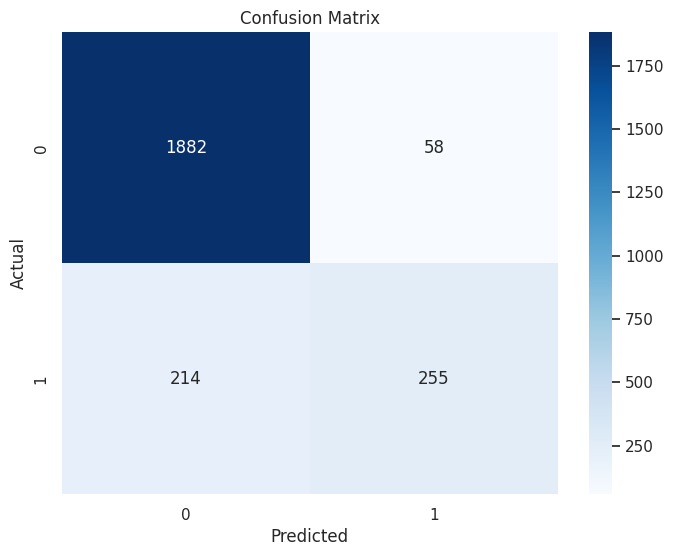

In [ ]:
#LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')
print(f"F2 Score: {f2}")
print('\n')
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9609796596097966
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1940
           1       0.88      0.93      0.90       469

    accuracy                           0.96      2409
   macro avg       0.93      0.95      0.94      2409
weighted avg       0.96      0.96      0.96      2409

F2 Score: 0.9610912297166654




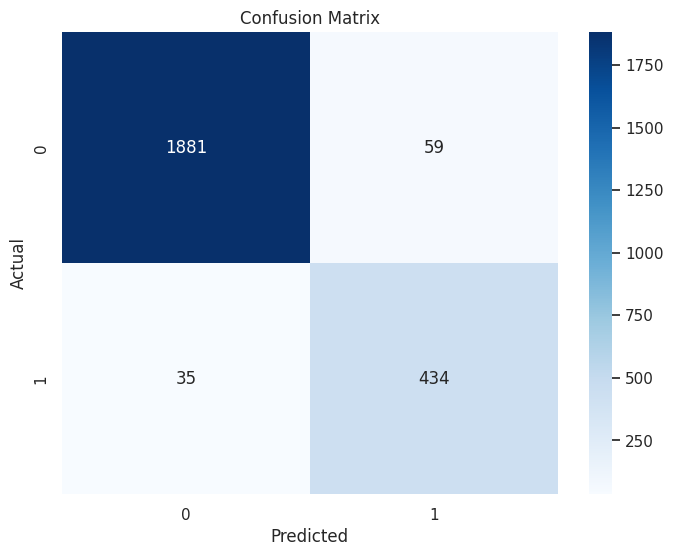

In [ ]:
#KNN
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')
print(f"F2 Score: {f2}")
print('\n')
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.954337899543379
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1940
           1       0.90      0.86      0.88       469

    accuracy                           0.95      2409
   macro avg       0.93      0.92      0.93      2409
weighted avg       0.95      0.95      0.95      2409

F2 Score: 0.9541619310346499




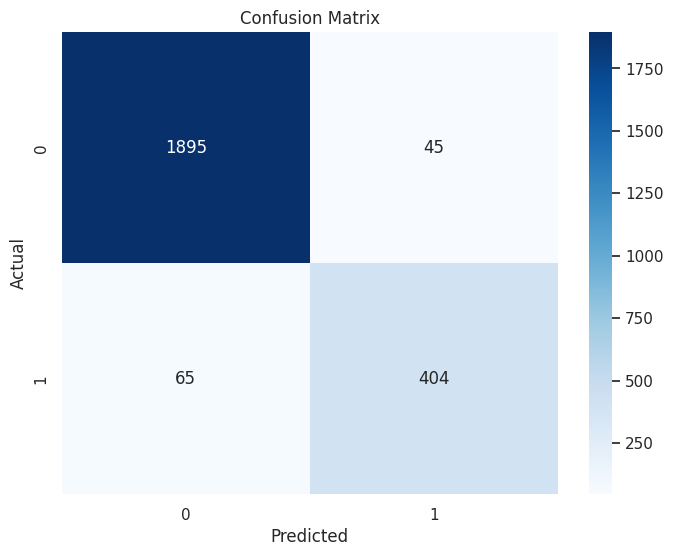

In [ ]:
#SVM
svm=SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')
print(f"F2 Score: {f2}")
print('\n')
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9804898298048983
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1940
           1       0.93      0.97      0.95       469

    accuracy                           0.98      2409
   macro avg       0.96      0.98      0.97      2409
weighted avg       0.98      0.98      0.98      2409

F2 Score: 0.9805263625082117




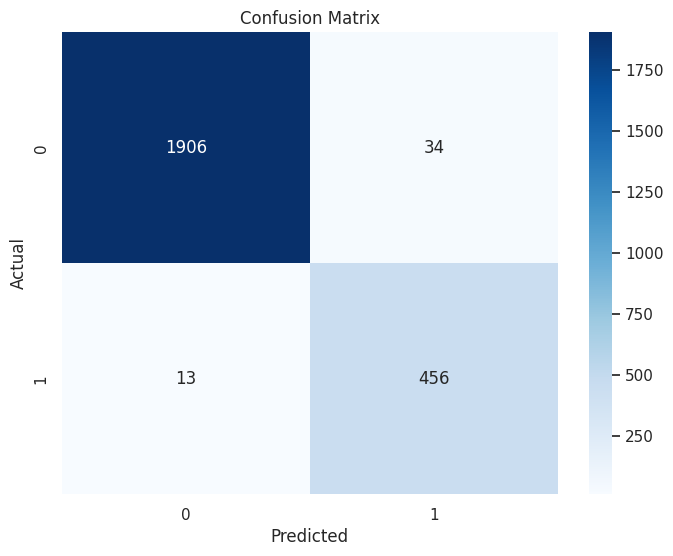

In [ ]:
#RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')
print(f"F2 Score: {f2}")
print('\n')
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9817351598173516
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1940
           1       0.94      0.97      0.95       469

    accuracy                           0.98      2409
   macro avg       0.97      0.98      0.97      2409
weighted avg       0.98      0.98      0.98      2409

F2 Score: 0.9817651646143085




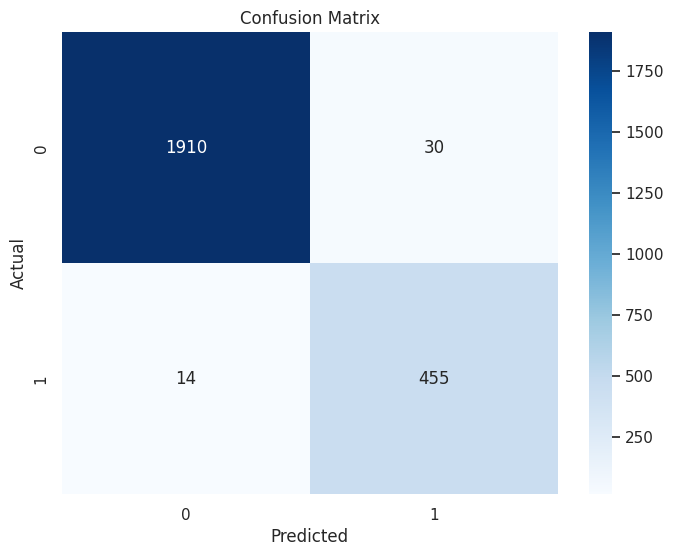

In [ ]:
#XGBoost
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')
print(f"F2 Score: {f2}")
print('\n')
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Multi-Class Classification**

In [ ]:
x=df[features]
y=df['Failure Type']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Accuracy: 0.8929016189290162
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1923
           1       0.90      0.85      0.87       125
           2       0.74      0.14      0.23       122
           3       0.83      0.79      0.81       120
           4       0.64      0.30      0.41       119

    accuracy                           0.89      2409
   macro avg       0.80      0.61      0.65      2409
weighted avg       0.88      0.89      0.87      2409

F2 Score: 0.8828590043767401




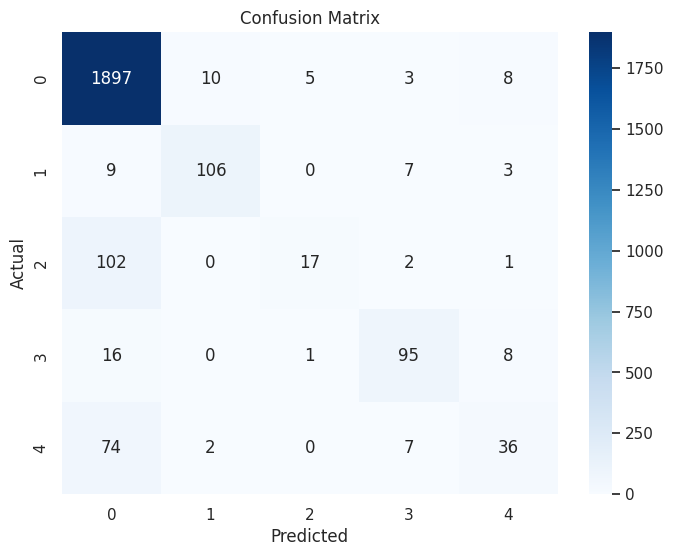

In [ ]:
#LogisticRegression
lr=LogisticRegression(multi_class='ovr')
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')
print(f"F2 Score: {f2}")
print('\n')
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.950186799501868
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1923
           1       0.93      0.90      0.91       125
           2       0.76      0.79      0.77       122
           3       0.83      0.97      0.90       120
           4       0.87      0.92      0.89       119

    accuracy                           0.95      2409
   macro avg       0.87      0.91      0.89      2409
weighted avg       0.95      0.95      0.95      2409

F2 Score: 0.9503016852093865




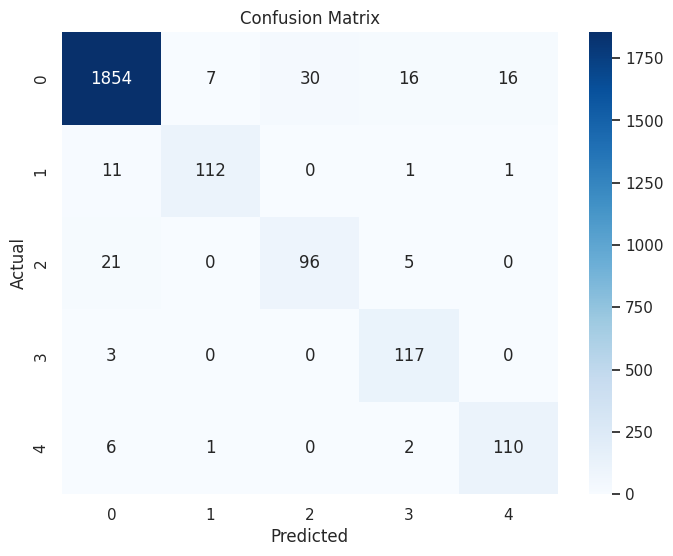

In [ ]:
#KNN
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')
print(f"F2 Score: {f2}")
print('\n')
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9476961394769614
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1923
           1       0.94      0.96      0.95       125
           2       0.93      0.51      0.66       122
           3       0.88      0.97      0.92       120
           4       0.82      0.82      0.82       119

    accuracy                           0.95      2409
   macro avg       0.91      0.85      0.86      2409
weighted avg       0.95      0.95      0.94      2409

F2 Score: 0.9457995454296071




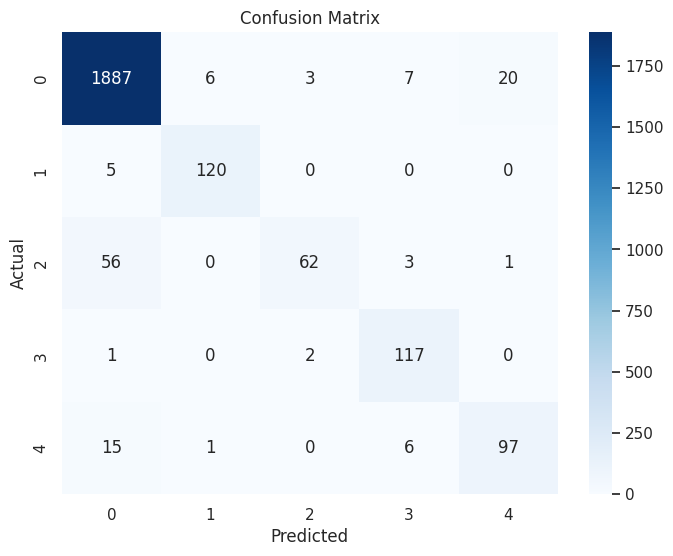

In [ ]:
#SVM
svm=SVC(decision_function_shape='ovr')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')
print(f"F2 Score: {f2}")
print('\n')
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9759236197592362
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1923
           1       0.94      0.95      0.95       125
           2       0.91      0.94      0.92       122
           3       0.96      0.98      0.97       120
           4       0.91      0.91      0.91       119

    accuracy                           0.98      2409
   macro avg       0.94      0.95      0.95      2409
weighted avg       0.98      0.98      0.98      2409

F2 Score: 0.9759483542181006




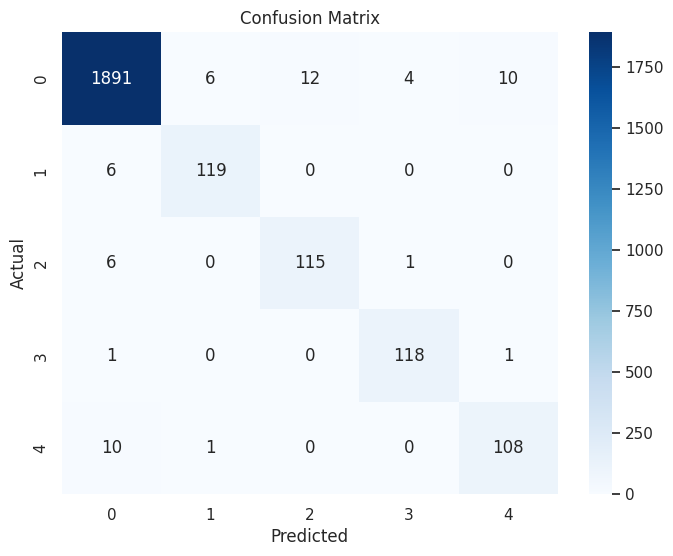

In [ ]:
#RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')
print(f"F2 Score: {f2}")
print('\n')
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9784142797841427
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1923
           1       0.96      0.95      0.96       125
           2       0.92      0.95      0.94       122
           3       0.95      0.98      0.97       120
           4       0.92      0.91      0.91       119

    accuracy                           0.98      2409
   macro avg       0.95      0.96      0.95      2409
weighted avg       0.98      0.98      0.98      2409

F2 Score: 0.9784222731978732




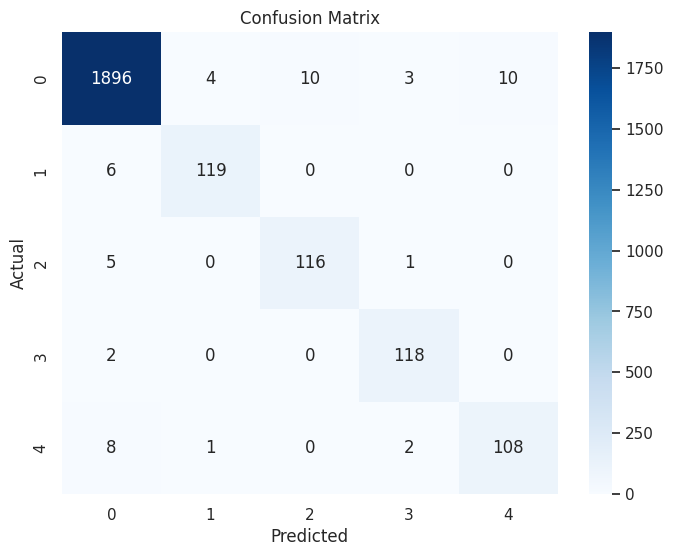

In [ ]:
#XGBoost
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')
print(f"F2 Score: {f2}")
print('\n')
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<Figure size 2500x2000 with 0 Axes>

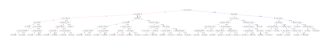

In [ ]:
from xgboost import plot_tree

plt.figure(figsize=(25,20))
plot_tree(xgb, num_trees=0)
plt.savefig("decision_tree.png",dpi=2000)
plt.show()

**Clustering**


KMeans Accuracy: 0.6152781621920841
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      2866
           1       0.15      0.18      0.16       747

    accuracy                           0.62      3613
   macro avg       0.46      0.45      0.46      3613
weighted avg       0.64      0.62      0.63      3613



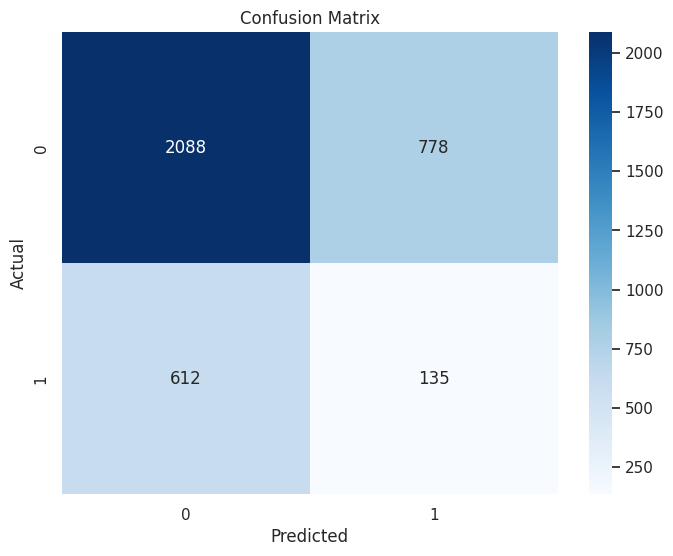

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

x = df[features]
y = df['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

kmeans= KMeans(n_clusters=2, random_state=42)
kmeans.fit(x_train)
y_pred_clusters = kmeans.predict(x_test)

cluster_to_target_mapping = {
    0: 0,  # Cluster 0 is Target 0
    1: 1,  # Cluster 1 is Target 1
}

y_pred_mapped = [cluster_to_target_mapping[cluster] for cluster in y_pred_clusters]

accuracy = accuracy_score(y_test, y_pred_mapped)
print(f"KMeans Accuracy: {accuracy}")

print(classification_report(y_test, y_pred_mapped))
cm = confusion_matrix(y_test,y_pred_mapped)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


KMeans Accuracy (Multi-class): 0.10462219761970662
              precision    recall  f1-score   support

           0       0.45      0.13      0.20      2873
           1       0.00      0.00      0.00       201
           2       0.03      0.02      0.02       190
           3       0.00      0.00      0.00       175
           4       0.00      0.00      0.00       174

    accuracy                           0.10      3613
   macro avg       0.10      0.03      0.04      3613
weighted avg       0.36      0.10      0.16      3613



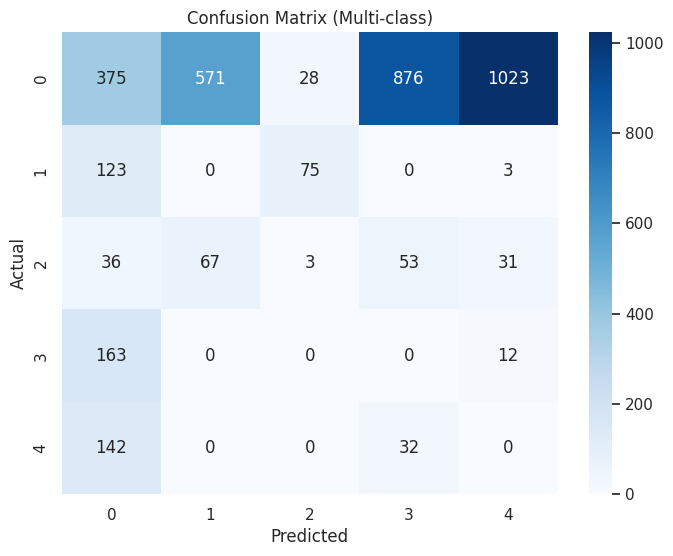

In [ ]:
x = df[features]
y = df['Failure Type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(x_train)
y_pred_clusters = kmeans.predict(x_test)

unique_failure_types = df['Failure Type'].unique()
cluster_to_failure_mapping = dict(zip(range(len(unique_failure_types)), unique_failure_types))

y_pred_mapped = [cluster_to_failure_mapping[cluster] for cluster in y_pred_clusters]

accuracy = accuracy_score(y_test, y_pred_mapped)
print(f"KMeans Accuracy (Multi-class): {accuracy}")

print(classification_report(y_test, y_pred_mapped))
cm = confusion_matrix(y_test,y_pred_mapped)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Multi-class)')
plt.show()
